## Amazon ratings analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

#### movie_ratings

In [2]:
df_ratings_movie = pd.read_csv('/home/ignacio/Datasets/Amazon/Data cleaned/ratings_movie_intersect_greater_1.csv') 
df_ratings_movie.head()

,userId,asin,rating,reviewTime,movieId
0,AGEIT17HENDIS,0764003828,3.0,1185062400,1963
1,A1GGOC9PVDXW7Z,0764003828,2.0,1280016000,1963
2,A34PAZQ73SL163,0764003828,5.0,1110585600,1963
3,A20IIR0422G3A5,0764003828,5.0,1115078400,1963
4,AW3VZ5O895LRK,0764003828,4.0,1379116800,1963


In [31]:
df_users_group_movie = df_ratings_movie.groupby('userId').size()
df_users_group_movie.head()

userId
A106016KSI0YQ     13
A10E3F50DIUJEE     4
A10EH95EUDO9W3     4
A10Q8NIFOVOHFV     2
A10X0JN8KTK89H     2
dtype: int64

In [32]:
movie_dist = df_users_group_movie.value_counts().reset_index(name='count')
#movie_dist = movie_dist.rename('movie dist')
movie_dist.head()

,index,count
0,2,522
1,3,239
2,4,154
3,5,94
4,6,81


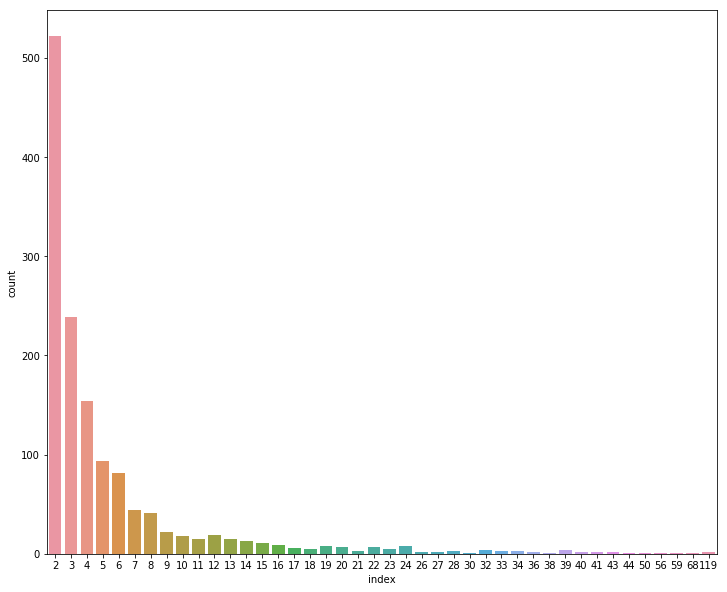

In [37]:
plt.figure(figsize=(12,10))
sns.barplot(x='index', y='count', data=movie_dist)
#g.set_xticklabels(labels=df_genres['genre'],rotation=45)

In [ ]:
df_users_group_movie = df_users_group_movie[df_users_group_movie > 1]
df_users_group_movie.head()

In [ ]:
df_ratings_movie = df_ratings_movie[df_ratings_movie['userId'].isin(list(df_users_group_movie.index))]
df_ratings_movie.head()

In [ ]:
len(df_ratings_movie['userId'].unique())

In [34]:
df_ratings_movie.to_csv('/home/ignacio/Datasets/Amazon/Data cleaned/ratings_movie_intersect_greater_1.csv', index=False)

#### Book-ratings

In [8]:
df_ratings_book = pd.read_csv('/home/ignacio/Datasets/Amazon/Data cleaned/ratings_book_intersect_greater_1.csv')
df_ratings_book.head()

,userId,asin,rating,reviewTime,ISBN
0,AGEIT17HENDIS,0002051850,4.0,1148860800,0684803356
1,A2RM9L2MM9EQVE,0002051850,5.0,1222905600,0684803356
2,AHCVWPLA1O4X8,0002051850,5.0,1059696000,0684803356
3,A4BNZ1OSBO77S,0002051850,5.0,1059350400,0684803356
4,A4X7FBQ5SKPI6,0002051850,5.0,1186185600,0684803356


In [35]:
df_users_group_book = df_ratings_book.groupby('userId').size()
df_users_group_book.head()

userId
A106016KSI0YQ     33
A10E3F50DIUJEE     6
A10EH95EUDO9W3     4
A10Q8NIFOVOHFV     2
A10X0JN8KTK89H     7
dtype: int64

In [36]:
book_dist = df_users_group_book.value_counts().reset_index(name='count')
#movie_dist = movie_dist.rename('movie dist')
book_dist.head()

,index,count
0,2,217
1,3,176
2,4,137
3,5,112
4,6,86


In [18]:
xlabels =[ x if x%5==0 else '' for x in list(book_dist['index'])]

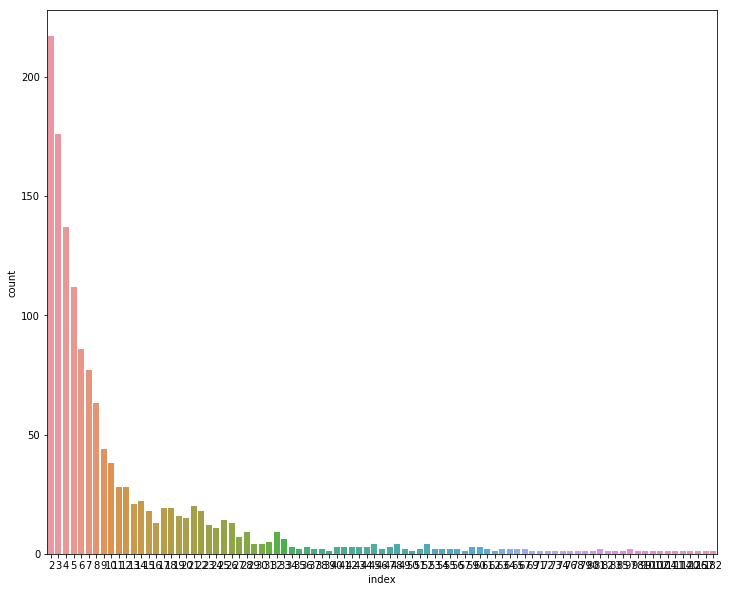

In [38]:
plt.figure(figsize=(12,10))
g = sns.barplot(x='index', y='count', data=book_dist)
#g.set_xticklabels(labels=xlabels,rotation=45)

In [ ]:
df_users_group_book = df_users_group_book[df_users_group_book > 1]
df_users_group_book.head()

In [ ]:
df_ratings_book = df_ratings_book[df_ratings_book['userId'].isin(list(df_users_group_book.index))]
df_ratings_book.head()

In [ ]:
len(df_ratings_book['userId'].unique())

In [39]:
df_ratings_book.to_csv('/home/ignacio/Datasets/Amazon/Data cleaned/ratings_book_intersect_greater_1.csv', index=False)

## Intersect users ratings

In [21]:
users_intersect = df_ratings_book['userId'][df_ratings_book['userId'].isin(df_ratings_movie['userId'])]
users_intersect.head()

0    AGEIT17HENDIS
2    AHCVWPLA1O4X8
3    A4BNZ1OSBO77S
4    A4X7FBQ5SKPI6
6    AI37YX1U4KB1L
Name: userId, dtype: object

In [23]:
len(users_intersect.unique())

1384

In [24]:
df_ratings_movie = df_ratings_movie[df_ratings_movie['userId'].isin(users_intersect)]
df_ratings_movie.head()

,userId,asin,rating,reviewTime,movieId
0,AGEIT17HENDIS,0764003828,3.0,1185062400,1963
2,A34PAZQ73SL163,0764003828,5.0,1110585600,1963
3,A20IIR0422G3A5,0764003828,5.0,1115078400,1963
4,AW3VZ5O895LRK,0764003828,4.0,1379116800,1963
5,A161ANWB62G3M8,0764003828,5.0,1222041600,1963


In [41]:
user_example = df_ratings_movie[df_ratings_movie['userId'] == 'AGEIT17HENDIS']

In [42]:
len(user_example)

28

In [27]:
df_ratings_book = df_ratings_book[df_ratings_book['userId'].isin(users_intersect)]
df_ratings_book.head()

,userId,asin,rating,reviewTime,ISBN
0,AGEIT17HENDIS,0002051850,4.0,1148860800,0684803356
2,AHCVWPLA1O4X8,0002051850,5.0,1059696000,0684803356
3,A4BNZ1OSBO77S,0002051850,5.0,1059350400,0684803356
4,A4X7FBQ5SKPI6,0002051850,5.0,1186185600,0684803356
6,AI37YX1U4KB1L,0002051850,5.0,1046822400,0684803356


In [43]:
user_example_book = df_ratings_book[df_ratings_book['userId'] == 'AGEIT17HENDIS']

In [44]:
len(user_example_book)

56